# 911 Calls Analysis Project

For this analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624239 entries, 0 to 624238
Data columns (total 9 columns):
lat          624239 non-null float64
lng          624239 non-null float64
desc         624239 non-null object
zip          548027 non-null float64
title        624239 non-null object
timeStamp    624239 non-null object
twp          623970 non-null object
addr         624239 non-null object
e            624239 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 42.9+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    42542
19464.0    41056
19403.0    32665
19446.0    30283
19406.0    21208
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    52609
ABINGTON        37613
NORRISTOWN      35020
UPPER MERION    34165
CHELTENHAM      28779
Name: twp, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    52609
ABINGTON        37613
NORRISTOWN      35020
UPPER MERION    34165
CHELTENHAM      28779
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

147

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts()

EMS        310876
Traffic    219985
Fire        93378
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

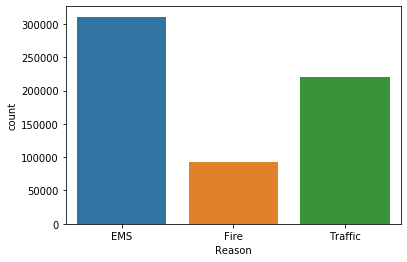

In [12]:
sns.countplot(x = 'Reason', data = df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time : time.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

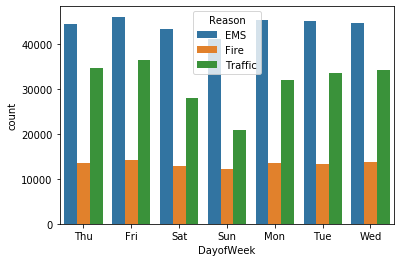

In [18]:
sns.countplot(x = 'DayofWeek', hue ='Reason',data = df)

**Now do the same for Month:**

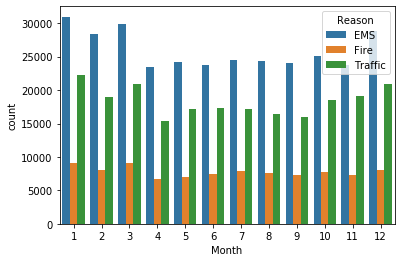

In [19]:
sns.countplot(x = 'Month', hue ='Reason',data = df)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [21]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayofWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

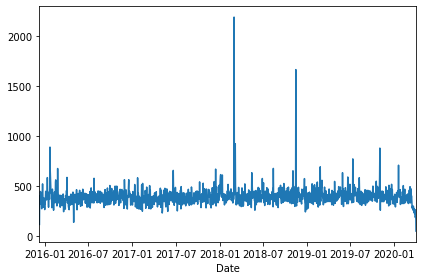

In [25]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

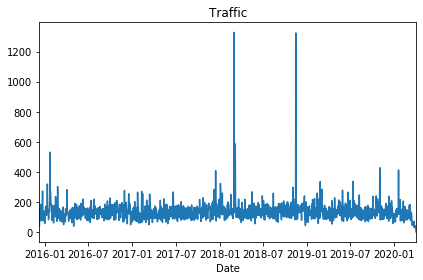

In [26]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

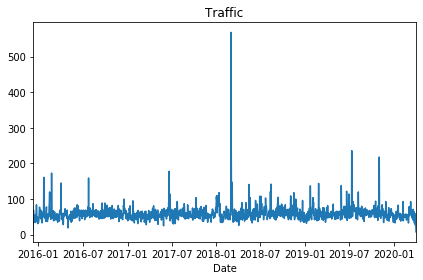

In [27]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

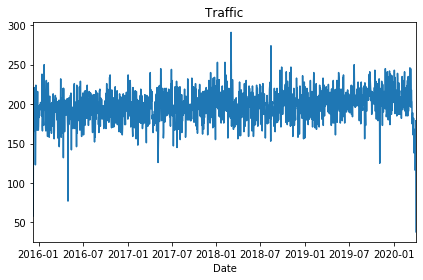

In [28]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [32]:
dayHour = df.groupby(by=['DayofWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1850,1519,1356,1231,1228,1540,2542,3962,4791,4986,...,6024,6628,6688,6754,5340,4761,4094,3651,3219,2681
Mon,1766,1460,1279,1187,1256,1732,2555,4250,5281,5436,...,5318,5826,5993,6085,5142,4221,3546,3045,2484,1941
Sat,2294,1939,1794,1498,1361,1478,1767,2378,3277,4083,...,5106,4870,4891,4907,4706,4486,3901,3660,3030,2794
Sun,2289,2024,1829,1519,1388,1381,1643,2268,2843,3523,...,4426,4205,4262,4247,4133,3918,3507,2946,2450,2175
Thu,1611,1309,1324,1159,1183,1665,2677,4264,5085,5097,...,5671,6100,5989,6589,5208,4414,3843,3285,2666,2208


** Now create a HeatMap using this new DataFrame. **

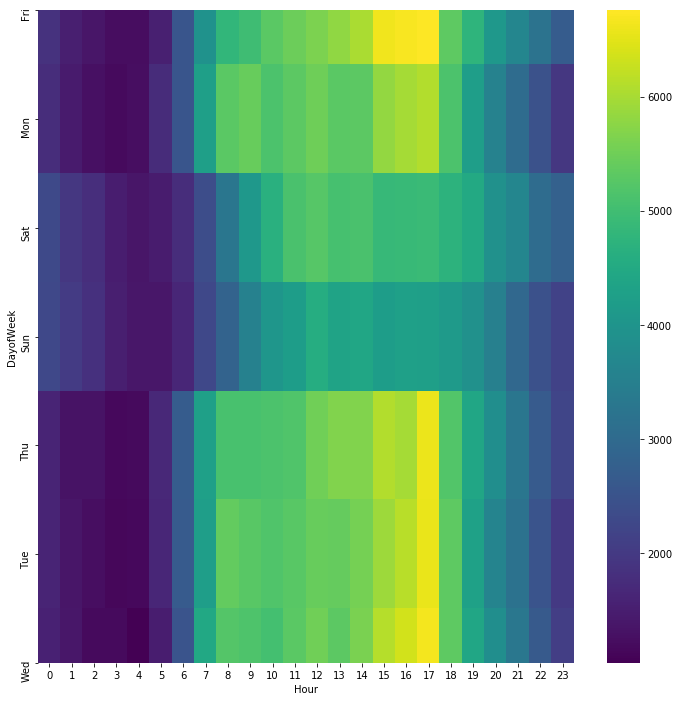

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(dayHour,cmap ='viridis')

** Now create a clustermap using this DataFrame. **

<Figure size 864x864 with 0 Axes>

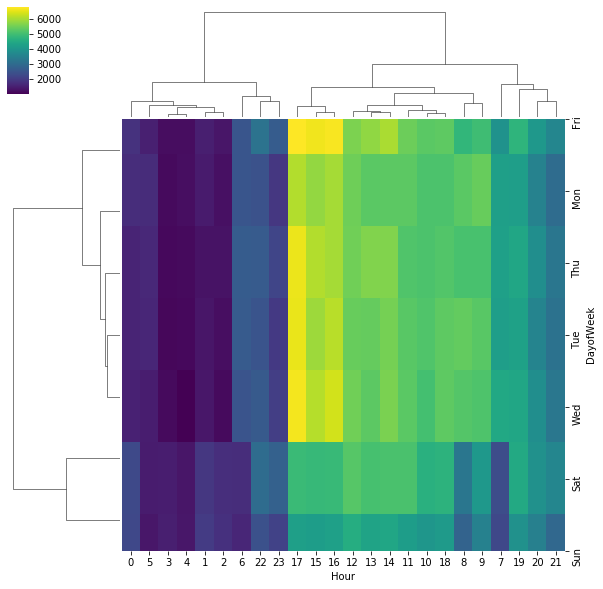

In [39]:
plt.figure(figsize=(12,12))
sns.clustermap(dayHour,cmap ='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [40]:
dayHour = df.groupby(by=['DayofWeek','Month']).count()['Reason'].unstack()
dayHour.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayofWeek,,,,,,,,,,,,
Fri,9309,8255,10941,6922,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7170,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,6530,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,5911,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6147,7524,7850,6964,7508,6954,7482,8358,8151


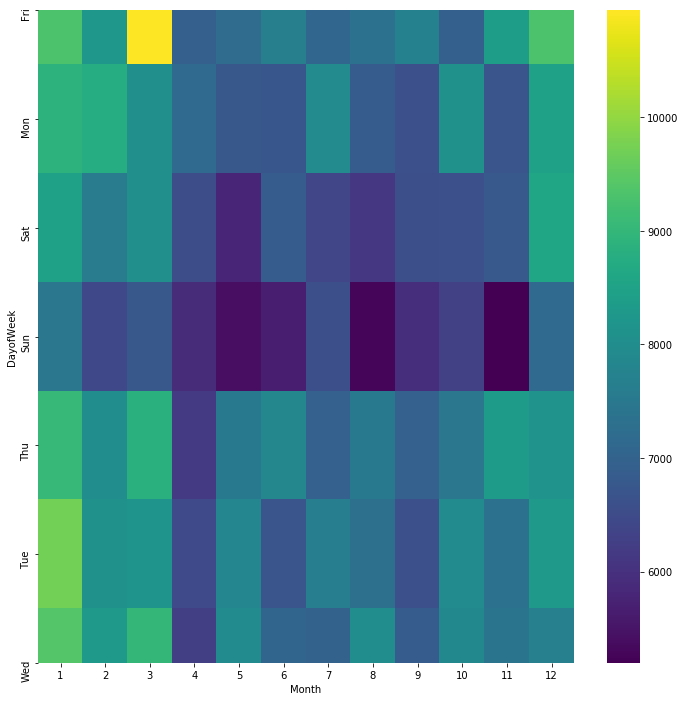

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(dayHour,cmap ='viridis')

<Figure size 864x864 with 0 Axes>

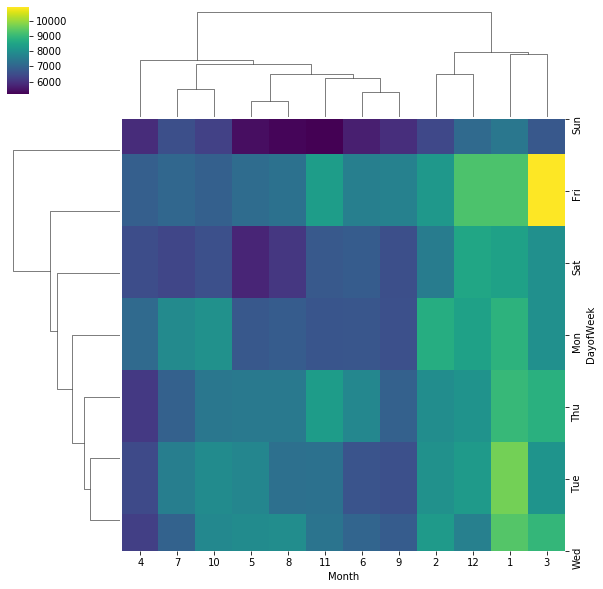

In [42]:
plt.figure(figsize=(12,12))
sns.clustermap(dayHour,cmap ='viridis')

**Continue exploring the Data however you see fit!**
# Great Job!